<a href="https://colab.research.google.com/github/seochongwoo/PS/blob/main/%5BAI2025_Assignment%5D_CIFAR10_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR10 Classification

## Import Packages

In [ ]:
import sys
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

### Data Preparation
Use CIFAR10 handwriting dataset

In [ ]:
cifar10 = tf.keras.datasets.cifar10

Prepare data for training

In [ ]:
# train / test split
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# minmax normalization
x_train, x_test = x_train / 255.0, x_test / 255.0

# one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


# Compile and Train neural network

## CNN Modeling
Create a convolutional neural network

### Goal

Improve the provided basic CNN model and achieve CIFAR-10 **test accuracy ≥ 75%**.


Modify the network architecture!

In [ ]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 데이터 증강
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

model = tf.keras.models.Sequential([

    # 첫 번째 블록: 64 filters
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'),
    BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),

    # 두 번째 블록: 128 filters
    tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),

    # 세 번째 블록: 256 filters
    tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),

    # Flatten and Dense layers
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compile and Train neural network

In [ ]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=32),  # 증강 적용 (batch_size=32)
    steps_per_epoch=len(x_train) // 32,
    epochs=30,  # 30으로 증가
    validation_data=(x_test, y_test)
)

Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 61s 31ms/step - accuracy: 0.3433 - loss: 2.0642 - val_accuracy: 0.4965 - val_loss: 1.4282
Epoch 2/30
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.5938 - loss: 1.1503

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 757us/step - accuracy: 0.5938 - loss: 1.1503 - val_accuracy: 0.4908 - val_loss: 1.4567
Epoch 3/30
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 0.5843 - loss: 1.1833 - val_accuracy: 0.7068 - val_loss: 0.8531
Epoch 4/30
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 766us/step - accuracy: 0.6250 - loss: 1.2509 - val_accuracy: 0.7095 - val_loss: 0.8428
Epoch 5/30
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 0.6712 - loss: 0.9473 - val_accuracy: 0.7115 - val_loss: 0.8685
Epoch 6/30
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 764us/step - accuracy: 0.8438 - loss: 0.7104 - val_accuracy: 0.7053 - val_loss: 0.8929
Epoch 7/30
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.7124 - loss: 0.8317 - val_accuracy: 0.7290 - val_loss: 0.8643
Epoch 8/30
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 765us/step - accuracy: 0.6562 - loss: 1.0096 - val_accuracy: 0.7267 - val_loss: 0.8679
Epoch 9/30
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 0.7437 - loss: 0.74

## Evaluate neural network performance


In [ ]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - 4ms/step - accuracy: 0.8597 - loss: 0.4122


[0.41222357749938965, 0.8597000241279602]

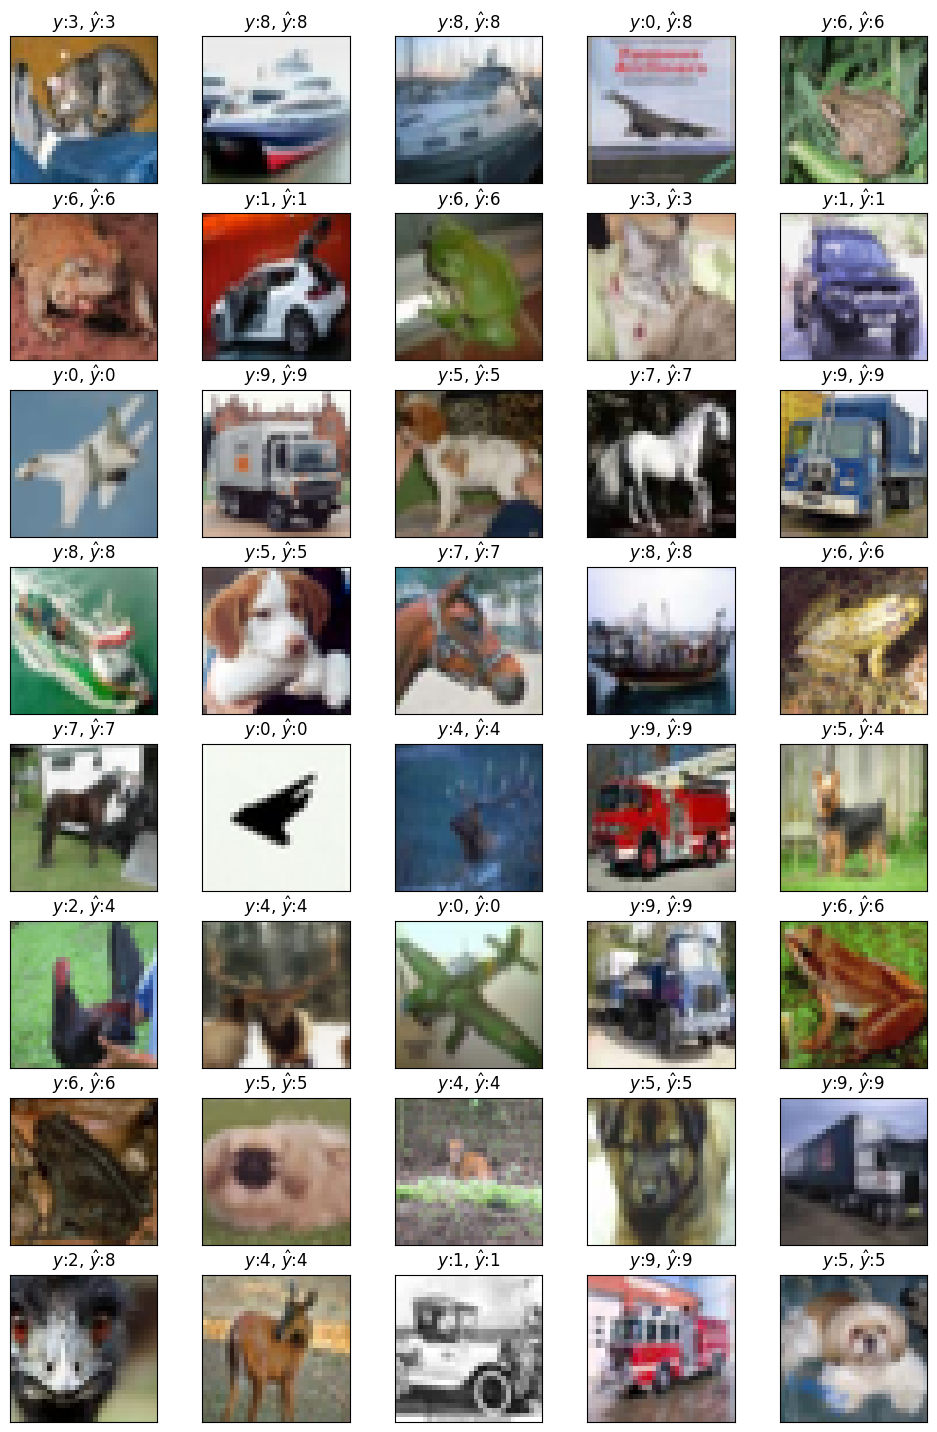

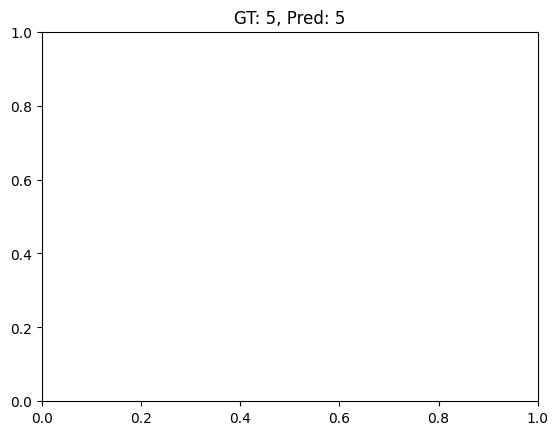

In [ ]:
prob = model.predict(x_test[0:40], verbose=0)
pred = tf.argmax(prob, axis=1)

fig = plt.figure(figsize=(12, 18))
for i in range(40):
    subplot = fig.add_subplot(8, 5, i + 1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    string = r'$\hat{y}$'
    subplot.set_title(f'$y$:{tf.argmax(y_test[i])}, {string}:{pred[i].numpy()}')
    subplot.imshow(tf.squeeze(x_test[i]))
plt.show()
true_label = tf.argmax(y_test[i]).numpy()
pred_label = pred[i].numpy()
plt.title(f"GT: {true_label}, Pred: {pred_label}")
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy:", accuracy)


Test Accuracy: 0.8597000241279602
